# Hall Effect Notebook - February 2024 
#### James Amidei, Zach Stedman, and Max Markgraf
---------------------------------------------------

In [2]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def extract_data(directory):
    data_dict = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as csvfile:
                csv_reader = csv.reader(csvfile)
                
                for _ in range(8):
                    next(csv_reader)
                
                voltage = []
                current = []
                
                for row in csv_reader:
                    if len(row) >= 15:  
                        voltage.append(row[1])  
                        current.append(row[14])  
                    else:
                        print(f'Skipping row {row}')
                data_dict[filename] = (voltage, current)
    return data_dict

dir_path = 'HallEffectFeb24'
data_dict = extract_data(dir_path)

#data_dict.keys()
#voltageBQ1, currentBQ1 = data_dict['HallBQ1.csv']

for filename, data in data_dict.items():
    voltage, current = data
    voltage_variable_name = f'{os.path.splitext(filename)[0]}_voltage'
    current_variable_name = f'{os.path.splitext(filename)[0]}_current'
    globals()[voltage_variable_name] = voltage 
    globals()[current_variable_name] = current
    
#dir()

### Finding the Resistance and Resistivity

$$ V = RI \hspace{0.5cm} \text{ Ohm's law}$$

Since we can see a very linear relationship between the current and voltage in our when no magentic field is present, we can use Ohm's law to find the resistance. If we plot the values of the current on the x-axis, and the values for the voltage on the y-axis, our slope will be the resistance.

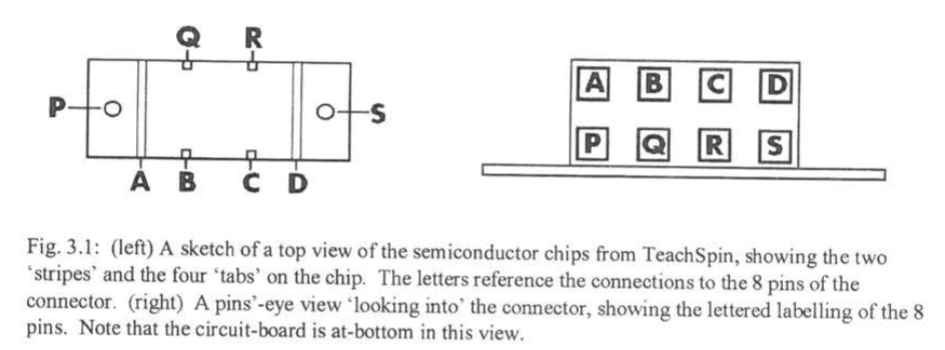

Linear fit for ResistBC1.csv: V = (87.85050897 +/- 0.00868031) I + 0.00001437
Linear fit for ResistBC2.csv: V = (87.83943163 +/- 0.00827114) I + 0.00001538
Linear fit for ResistQR1.csv: V = (87.39626631 +/- 0.01175926) I + 0.00003408
Linear fit for ResistQR2.csv: V = (86.89558920 +/- 0.01198674) I + 0.00003139


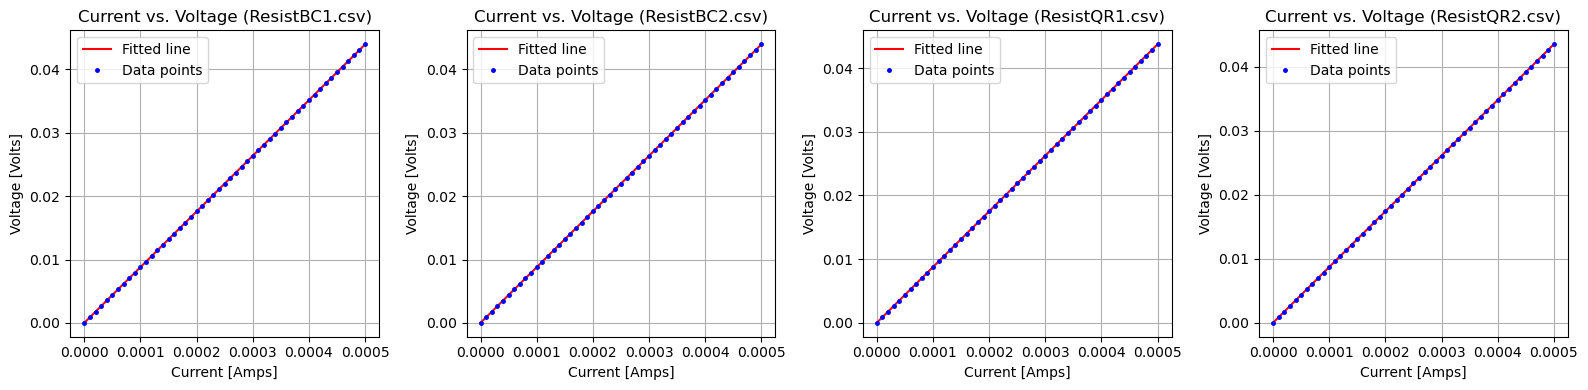

In [11]:
data_sets = [('ResistBC1_current', 'ResistBC1_voltage', 'ResistBC1.csv'),
             ('ResistBC2_current', 'ResistBC2_voltage', 'ResistBC2.csv'),
             ('ResistQR1_current', 'ResistQR1_voltage', 'ResistQR1.csv'),
             ('ResistQR2_current', 'ResistQR2_voltage', 'ResistQR2.csv')]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    slope, intercept, _, _, std_err = stats.linregress(I, V)

    axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(I, V, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Current [Amps]')
    axs[i].set_ylabel('Voltage [Volts]')
    axs[i].set_title(f'Current vs. Voltage ({title})')
    axs[i].grid(True)
    axs[i].legend()

    print(f"Linear fit for {title}: V = ({slope:.8f} +/- {std_err:.8f}) I + {intercept:.8f}")

plt.tight_layout()
plt.show()

In [4]:
R_avg = (87.85050897 + 87.83943163 + 87.39626631 + 86.89558920)/4
R_err_avg = (0.00868031 + 0.00827114 + 0.01175926 + 0.01198674)/4
print(f'Average resistance of the circuit: {R_avg} +/- {R_err_avg}')

Average resistance of the circuit: 87.4954490275 +/- 0.010174362499999999


### Resistivity

We can find the resistivity with the following formula. 

$$ \rho = R \frac{A}{l} = R \frac{wt}{l} (\Omega *m) $$

That is, the resistivity $\rho$ is equal to the resistance times the area (width times thickness) over length. 

We were given the thickness on the semicondictors packagaing, but we had to measure the length and width ourselves. So there may be a need to revisit these calculations. 

In [5]:
R_avg_l = R_avg - R_err_avg # lower bound of resistance
R_avg_u = R_avg + R_err_avg # upper bound of resistance

t = 500e-6 # 500 micro meters
w = 0.003 # 0.3 cm
l = 0.018 # 1.8 cm

rho_l = R_avg_l * (w*t)/l
rho = R_avg * (w*t)/l
rho_u = R_avg_u * (w*t)/l

print('Lower resistivity: ', rho_l)
print()
print('Middle resistivity: ', rho)
print()
print('Upper resistivty: ', rho_u)
print()
print('Calculated resistivity is equal to ', rho, '+/-', rho_u-rho_l)

Lower resistivity:  0.0072904395554166685

Middle resistivity:  0.007291287418958335

Upper resistivty:  0.0072921352825

Calculated resistivity is equal to  0.007291287418958335 +/- 1.6957270833313845e-06


------------------------------
### With magnetic field present 

Linear fit for HallBQ1.csv: V = (0.30150992 +/- 0.01898714) I + -0.00000524
Linear fit for HallBQ2.csv: V = (0.30199204 +/- 0.01927253) I + -0.00000780
Linear fit for HallBR1.csv: V = (87.38262204 +/- 0.01258746) I + 0.00001283
Linear fit for HallBR2.csv: V = (87.36505117 +/- 0.01337833) I + -0.00000041


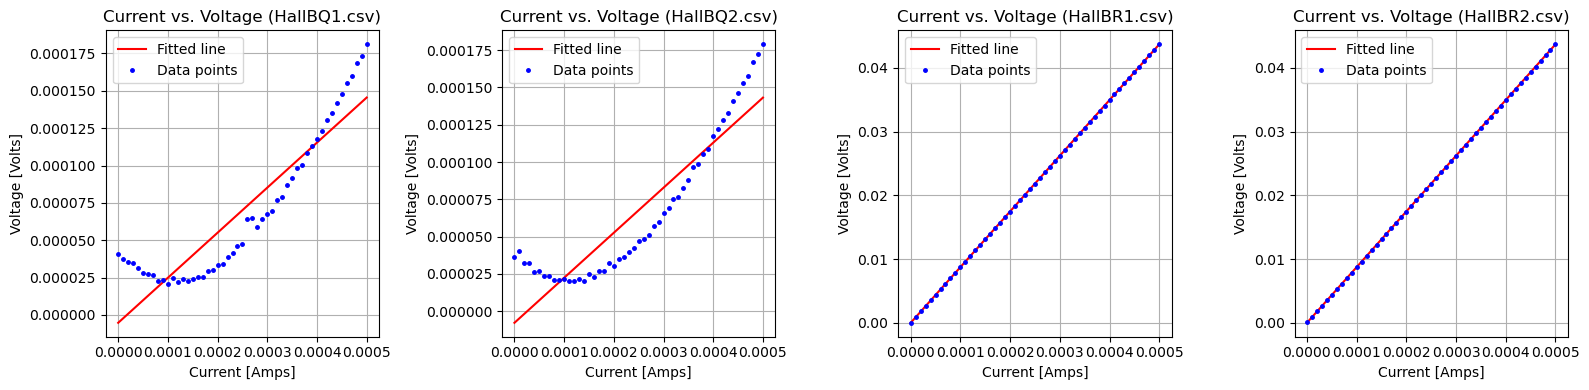

In [9]:
# When magnetic field is present
data_sets = [('HallBQ1_current', 'HallBQ1_voltage', 'HallBQ1.csv'),
             ('HallBQ2_current', 'HallBQ2_voltage', 'HallBQ2.csv'),
             ('HallBR1_current', 'HallBR1_voltage', 'HallBR1.csv'),
             ('HallBR2_current', 'HallBR2_voltage', 'HallBR2.csv')]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    slope, intercept, _, _, std_err = stats.linregress(I, V)

    axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(I, V, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Current [Amps]')
    axs[i].set_ylabel('Voltage [Volts]')
    axs[i].set_title(f'Current vs. Voltage ({title})')
    axs[i].grid(True)
    axs[i].legend()

    print(f"Linear fit for {title}: V = ({slope:.8f} +/- {std_err:.8f}) I + {intercept:.8f}")

plt.tight_layout()
plt.show()

Linear fit for HallCQ1.csv: V = (-88.34269547 +/- 0.01472905) I + -0.00001791
Linear fit for HallCQ2.csv: V = (-88.31050937 +/- 0.01627855) I + -0.00001862
Linear fit for HallCR1.csv: V = (-0.87094484 +/- 0.01719977) I + -0.00001890
Linear fit for HallCR2.csv: V = (-0.87235488 +/- 0.01736898) I + -0.00001922


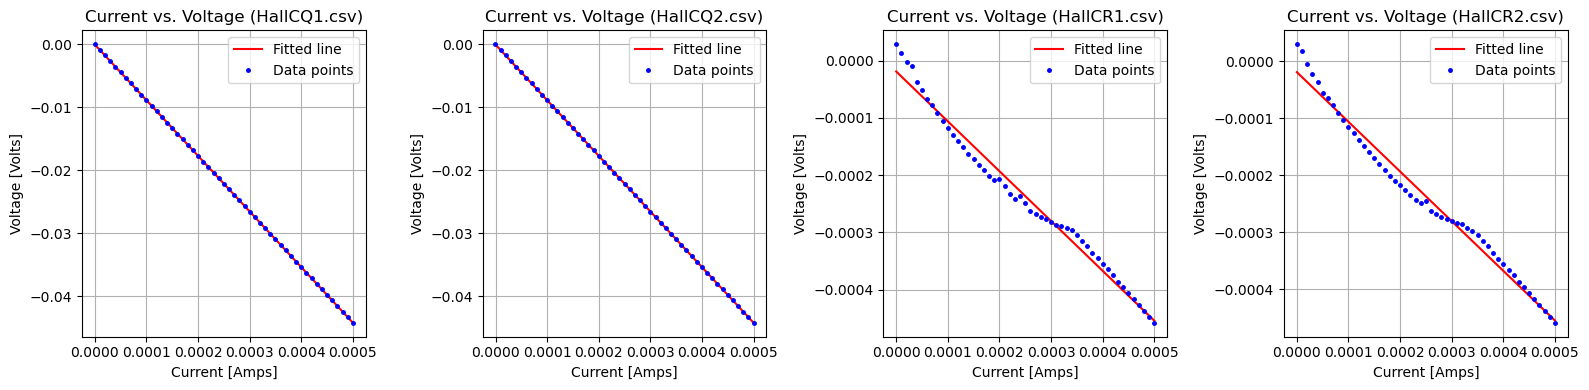

In [10]:
data_sets= [('HallCQ1_current', 'HallCQ1_voltage', 'HallCQ1.csv'),
           ('HallCQ2_current', 'HallCQ2_voltage', 'HallCQ2.csv'),
           ('HallCR1_current', 'HallCR1_voltage', 'HallCR1.csv'),
           ('HallCR2_current', 'HallCR2_voltage', 'HallCR2.csv')]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, (current_var, voltage_var, title) in enumerate(data_sets):
    I = np.asarray(globals()[current_var], dtype=np.float64)
    V = np.asarray(globals()[voltage_var], dtype=np.float64)

    slope, intercept, _, _, std_err = stats.linregress(I, V)

    axs[i].plot(I, intercept + slope * I, 'r', label='Fitted line')
    axs[i].errorbar(I, V, fmt='.', color='blue', label='Data points', markersize=5, capsize=3)
    axs[i].set_xlabel('Current [Amps]')
    axs[i].set_ylabel('Voltage [Volts]')
    axs[i].set_title(f'Current vs. Voltage ({title})')
    axs[i].grid(True)
    axs[i].legend()

    print(f"Linear fit for {title}: V = ({slope:.8f} +/- {std_err:.8f}) I + {intercept:.8f}")

plt.tight_layout()
plt.show()

##### Note: 
The configurations that go from B - Q and C - R only measure the vertical component of the voltage. This is the Hall voltage which is he result of the force generated by the magnetic field. 

The two other configurations, B - R and C - Q, go diagonally across, so they have both a vertical and horizontal component. Compare the magnitudes of the voltage and resistance with those from the plots from B - C and Q - R. This shows that the Hall voltage with relatively small compared to the horizontal voltage across the chip. 

------------------------------------------
$$\require{cancel}$$

### Hall Effect

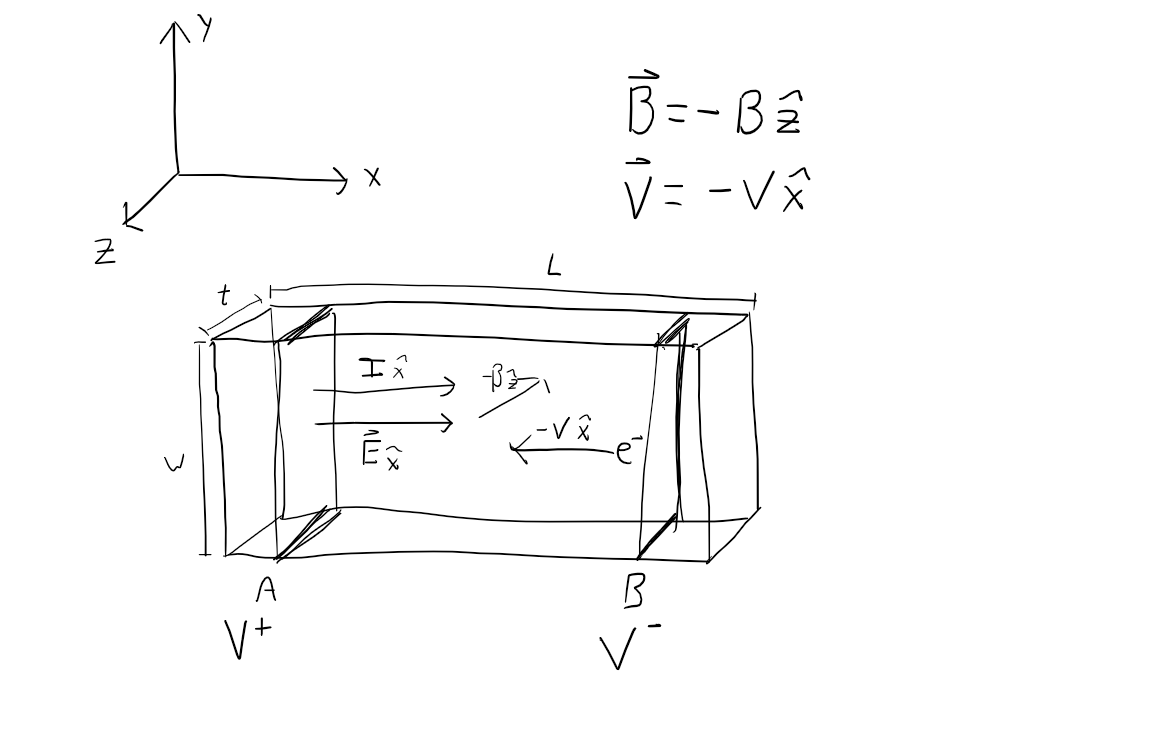

Rough sketch of semiconductor configuration. The electric field ran from tabs A to D, meaning that the electric field moved from from A to B in the positive $\hat{x}$ direction. In the drawing above, we assumed the charge carriers were electrons, which would move against the current in the negative $\hat{x}$ direction. We placed the chip in the magentic such that the magnetic field went in the negative $\hat{z}$ direction.

$$ q = -e$$
$$ \vec{v} = -v\hat{x}$$
$$\vec{B} = -B\hat{z}$$

$$ \vec{F_{B}} = q\vec{v} \times \vec{B} \rightarrow \vec{F_{B}} = -e(-v\hat{x}) \times (-B\hat{z}) $$
$$ \vec{F_{B}} = +evB\hat{y}$$

From this, calculation we'd exect to see a deflection in the positive $\hat{y}$ direction due to the magnetic field. 

If the charge carriers were holes, we would simply flip the sign of the velocity to be in the direction of the electrical field. 

$$ q = e$$
$$ \vec{v} = v\hat{x}$$
$$\vec{B} = -B\hat{z}$$

$$ \vec{F_{B}} = q\vec{v} \times \vec{B} \rightarrow \vec{F_{B}} = -e(v\hat{x}) \times (-B\hat{z}) $$
$$ \vec{F_{B}} = -evB\hat{y}$$

-------------------------------------------------------

Taking the equation for the current density, we can relate the velocity to both the quantity and magnitude of the individual charge carriers, as well as the geometry of the chip. 

$$ \vec{j} = \text{sign}(q)en\vec{v} = \text{sign}\frac{I}{A}\hat{x}$$

$$ \vec{v} = \text{sign}(q)\frac{I}{qnA}\hat{x} = \text{sign}(q)\frac{I}{qnwt}\hat{x} $$

$\text{sign}(q)$ is just the sign of the charge carrier and represents either a $+$ or $-$. 

Plugging this in the equation for the force due to the magnetic field, we get 

$$ \vec{F_{B}} = \text{sign}(q)q\vec{v} \times \vec{B} \rightarrow \vec{F_{B}} = \cancel{\text{sign}(q)q}\frac{I}{\cancel{\text{sign}(q)q}nwt}(\hat{x}) \times (-B\hat{z})$$

Using right hand rule,

$$ \vec{F_{B}} = -\frac{IB}{nwt}\hat{y}$$

This magnetic force deflects charges upward until the above force due to the magnetic field is opposed by an electrostatic force pointing in the downwards $\hat{y}$ direction. 

$$ \vec{F_{B}} = q\vec{E_{y}}\hat{y} = q\frac{V_{H}}{w}\hat{y} $$ 

The term $V_{H}$ is the Hall voltage. 

Equating the electrostatic force with the force due to the magnetic field we get

$$ q\frac{V_{H}}{w}\hat{y} = -\frac{IB}{nwt}\hat{y} $$

$$ V_{H} = -\text{sign}(q)\frac{B}{qnt}I \hspace{0.5cm} $$

The above has units of $\frac{T}{C \cdot m} \cdot A$, which reduces to 

$$ \frac{T}{C \cdot m} \cdot A \equiv \frac{\frac{kg}{s^2 \cdot A}}{A \cdot s \cdot m} \cdot A \equiv \frac{kg}{s^3 \cdot A^2 \cdot m} \cdot A \equiv \Omega \cdot A \equiv V$$

From above $\frac{B}{qnt}$ has units of $\Omega$. This is called the Hall resistance: $R_{H} \equiv \frac{B}{net}$.

The Hall resistance is found empirically by making a linear fit of the Hall voltage $V_H$ versus the current $I$. This is similar to how we found the initial resistance without the presence of the magnetic field. 

We can then use this to solve for the carrier density. 

$$ n = \frac{B}{qtR_{H}}$$



In [23]:
q = 1.602e-19 # C magnitude of charge carriers
B = 0.0925 # T magnetic field strength +/- 0.0005
t = 500e-6 # 500 micro meters

resistance_BQ_avg = (0.30150992 + 0.30199204)/2
resistance_err_BQ_avg = (0.01898714 + 0.01927253)/2  
resistance_CR_avg = (0.87094484 + 0.87235488)/2
resistance_err_CR_avg = (0.01719977 + 0.01736898)/2

n_BQ_l = B/q*t*(resistance_BQ_avg - resistance_err_BQ_avg)
n_BQ = B/q*t*resistance_BQ_avg 
n_BQ_u = B/q*t*(resistance_BQ_avg + resistance_err_BQ_avg)

n_CR_l = B/q*t*(resistance_CR_avg - resistance_err_CR_avg)
n_CR = B/q*t*resistance_CR_avg
n_CR_u = B/q*t*(resistance_CR_avg + resistance_err_CR_avg)

print(f'The Hall resistance measured from B-Q: {resistance_BQ_avg} +/- {resistance_err_BQ_avg}')
print()
print(f'The Hall resistance measured from C-R: {resistance_CR_avg} +/- {resistance_err_CR_avg}')
print()
print(f'The charge density from the Hall resistance measured from B-Q: {n_BQ} +/- {n_BQ_u - n_BQ_l}')
print()
print(f'The charge density from the Hall resistance measured from C-R: {n_CR} +/- {n_CR_u - n_CR_l}')

The Hall resistance measured from B-Q: 0.30175098 +/- 0.019129834999999998

The Hall resistance measured from C-R: 0.87164986 +/- 0.017284374999999998

The charge density from the Hall resistance measured from B-Q: 87115997659176.03 +/- 11045628823345.797

The charge density from the Hall resistance measured from C-R: 251646729244694.12 +/- 9980054229088.656
